In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import os
os.getcwd()


'C:\\Users\\mandapm\\Documents\\CS Class'

In [3]:
#changing working directory to point to file location
os.chdir('C:\\Users\\mandapm\\Documents\\CS Class\\assgn2')

In [4]:
# Loading data from crash dataset.
data = np.loadtxt('crash.txt')

# Splitting train and test with even and odd rows.
ytrain = np.array(data[::2,1])
ytest = np.array(data[1::2,1])

In [10]:
# Top 5 rows of training set
data[0:6,:]

array([[ 2.4,  0. ],
       [ 2.6, -1.3],
       [ 3.2, -2.7],
       [ 3.6,  0. ],
       [ 4. , -2.7],
       [ 6.2, -2.7]])

In [5]:
# Function for Linear Regression with polynomial basis function

def problem1():
    min_e_sqr_test = np.Infinity
    e_rms, et_rms = np.zeros(21),np.zeros(21)
    for i in range(1,21):
        poly = np.full((93,1),1)
        for L in range(1,i+1):
            k = data[:,0]**(L)
            k = k.reshape(-1,1)
            poly = np.concatenate((poly,k), axis=1)
        xtest= poly[1::2]
        xtrain = poly[::2]
        left = np.dot(xtrain.T,xtrain)
        right = np.dot(xtrain.T,ytrain)
        w = np.linalg.solve(left,right)
        train_predictions = np.dot(xtrain,w)
        e_sqr = (train_predictions - ytrain)**2
        e_rms[i] = np.sqrt(np.sum(e_sqr)/ytrain.shape[0])
        test_predictions = np.dot(xtest,w)
        e_sqr_test = (test_predictions - ytest)**2
        et_rms[i] = np.sqrt(np.sum(e_sqr_test)/ytest.shape[0]) 
        if et_rms[i] < min_e_sqr_test:
            min_e_sqr_test = et_rms[i]
            final_y_pred = test_predictions
    
    i= np.array(range(1,21))
    fig, axes = plt.subplots(nrows=2, ncols=1)
    fig.set_size_inches(8, 6)
    fig.tight_layout()
    plt.subplot(2, 1, 1)
    plt.plot(i,e_rms[1:])
    plt.plot(i,et_rms[1:])
    plt.xticks(i)
    plt.title('RMS')
    plt.legend(['Train','Validation'],loc='upper right')
    plt.subplot(2, 1, 2)
    plt.plot(data[::2,0], ytrain, 'o', color='yellow')
    plt.plot(data[1::2,0], ytest, 'o', color='blue')
    plt.plot(data[1::2,0], final_y_pred, '-', color='red')
    plt.title('Best fit')
    plt.legend(['Training data','Validation data','Validation best fit'],loc='upper right')


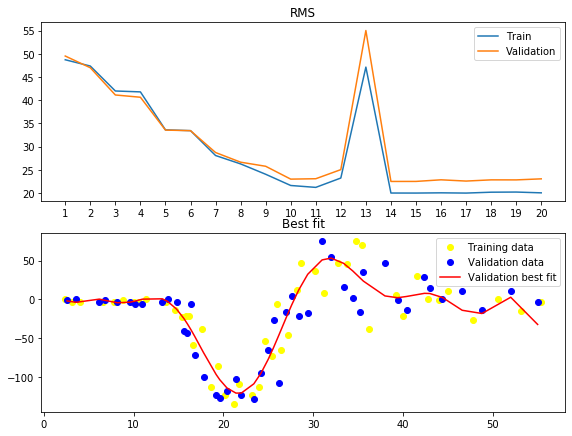

In [6]:
problem1()

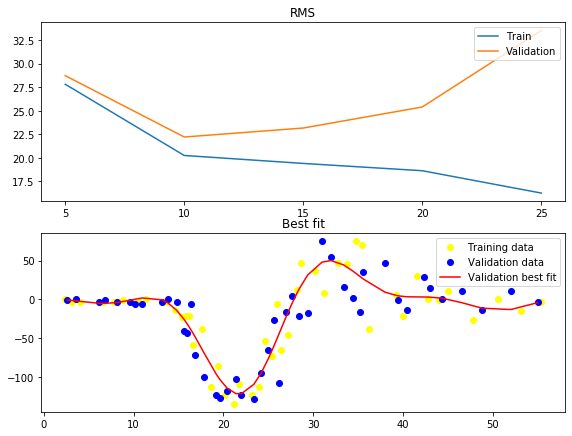

In [7]:
# Function for Linear Regression with radial basis function

def problem2():
    e_rms,et_rms = np.zeros(26),np.zeros(26)
    min_e_sqr_test = np.Infinity
    for L in [5,10,15,20,25]:
        fn = np.full((1,L+1),1.)
        mean = np.zeros(L+1)
        k = max(data[:,0])
        var = k/L
        tot_fn = np.array([])
        for x in data[:,0]:
            for i in range(1,L+1):   
                mean[i] = k*i/L
                fn[0,i] = np.exp(-((mean[i]-x)**2)/(2*(var**2)))
            fn=np.array(fn)
            tot_fn = np.vstack([tot_fn, fn]) if tot_fn.size else fn
        
        xtrain = np.array(tot_fn[::2])
        xtest = np.array(tot_fn[1::2])
        left = np.dot(xtrain.T,xtrain)
        right = np.dot(xtrain.T,ytrain)
        w = np.linalg.solve(left,right)
        train_predictions = np.dot(xtrain,w)
        e_sqr = (train_predictions - ytrain)**2
        e_rms[L] = np.sqrt(np.sum(e_sqr)/ytrain.shape[0])
        test_predictions = np.dot(xtest,w)
        e_sqr_test = (test_predictions - ytest)**2
        et_rms[L] = np.sqrt(np.sum(e_sqr_test)/ytest.shape[0]) 
        if et_rms[L] < min_e_sqr_test:
            min_e_sqr_test = et_rms[L]
            final_y_pred = test_predictions
    
    L= np.array([5,10,15,20,25])
    fig, axes = plt.subplots(nrows=2, ncols=1)
    fig.set_size_inches(8, 6)
    fig.tight_layout()
    plt.subplot(2, 1, 1)
    plt.plot(L,e_rms[[5,10,15,20,25]])
    plt.plot(L,et_rms[[5,10,15,20,25]])
    plt.legend(['Train','Validation'],loc='upper right')
    plt.xticks(L)
    plt.title('RMS')
    plt.subplot(2, 1, 2)
    plt.plot(data[::2,0], ytrain, 'o', color='yellow')
    plt.plot(data[1::2,0], ytest, 'o', color='blue')
    plt.plot(data[1::2,0], final_y_pred, '-', color='red')
    plt.legend(['Training data','Validation data','Validation best fit'],loc='upper right')
    plt.title('Best fit')

problem2()

In [8]:
# function for Linear regression adopting a Bayesian prior

def problem3():
    L=50
    fn = np.full((1,L+1),1.)
    mean = np.zeros(L+1)
    k = max(data[:,0])
    var = k/L
    tot_fn = np.array([])
    for x in data[:,0]:
        for i in range(1,L+1):
                 mean[i] = k*i/L
                 fn[0,i] = np.exp(-((mean[i]-x)**2)/(2*(var**2)))
        fn=np.array(fn)
        tot_fn = np.vstack([tot_fn, fn]) if tot_fn.size else fn
        
    xtrain = np.array(tot_fn[::2])
    xtest = np.array(tot_fn[1::2])

    min_e_rms = np.Infinity        
    for alpha in np.logspace(-8,0,100):
        left = np.dot(xtrain.T,xtrain) + ((alpha/0.0025)*np.identity(51))
        right = np.dot(xtrain.T,ytrain)
        w = np.linalg.solve(left,right)
        test_predictions = np.dot(xtest,w)
        e_sqr = (test_predictions - ytest)**2
        e_rms = np.sqrt(np.sum(e_sqr)/ytest.shape[0])
        if e_rms < min_e_rms:
            min_e_rms = e_rms
            best_alpha = alpha
    print('Best alpha is:',round(best_alpha,6))
    
problem3()

Best alpha is: 0.003126
